## Teste e escolha de Modelo

Após fazer uma exploração dos dados, vi que posssui um certo padrão de comportamento, onde após uma queda possuia uma grande subida acompanhada de um momento de pequenas variações e depois uma descida e o ciclo se repetia. Então isso demonstra um forte indício para usar modelos que possuem essa dinâmica Temporal.

Com isso é interessante o uso de modelos de **Rede Neural Recorrente** como o **LSTM**, uma vez que lidam bem com séries temporais e sequências. Além do mais outro modelo interessante é o **ARIMA**, que pode ser uam boa opção para capturar padrões lineares e sazonais e por pultimo quem sabe utilizar a biblioteca **Prophet** que apresentar um bom desempenho na modelagem desses componentes de séries temporais.

In [32]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import MinMaxScaler
import math

In [33]:
df = pd.read_csv('../data/raw/BTC-USD.csv')

In [34]:
data = df.filter(['Close'])
dataset = data.values

In [35]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [36]:
memory_days = 60

In [37]:
training_data_len = math.ceil(len(scaled_data) * 0.8)

train_data = scaled_data[:training_data_len, :]
test_data = scaled_data[training_data_len - memory_days:, :]

# Criar conjuntos de dados para treinamento
train_X = []
train_Y = []

for i in range(memory_days, len(train_data)):
    train_X.append(train_data[i-memory_days:i, 0])
    train_Y.append(train_data[i, 0])

# Converter para arrays numpy e redimensionar
train_X = np.array(train_X)
train_Y = np.array(train_Y)

train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [39]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

c:\Users\Inteli\OneDrive\Documentos\GitHub\Ponderada9pts\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [41]:
model.fit(train_X, train_Y, batch_size=1, epochs=3)

Epoch 1/3
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - loss: 0.0083
Epoch 2/3
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - loss: 0.0012
Epoch 3/3
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - loss: 7.7658e-04


In [42]:
model.save('../models/btc_model.h5')

In [43]:
test_X = []
test_Y = dataset[training_data_len:, :]

for i in range(memory_days, len(test_data)):
    test_X.append(test_data[i-memory_days:i, 0])

test_X = np.array(test_X)
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

In [1]:
# Usar os últimos dados de teste para iniciar as previsões
last_days = test_X[-1]  # Pega a última sequência do test_X
predictions = []
prevision_days = 30

for _ in range(prevision_days):
    # Reshape para a entrada do modelo
    last_days = last_days.reshape(1, memory_days, 1)
    
    # Previsão do próximo dia
    next_price = model.predict(last_days)
    
    # Inverter a escala
    next_price = scaler.inverse_transform(next_price)
    predictions.append(next_price[0][0])
    
    # Atualizar last_days com a nova previsão
    next_price_reshaped = next_price.reshape(1, 1, 1)  # Reshape para 3 dimensões
    last_days = np.append(last_days[:, 1:, :], next_price_reshaped, axis=1)

# Resultados das previsões
predictions = np.array(predictions)
print("Previsões para os próximos 30 dias:", predictions)


NameError: name 'test_X' is not defined

In [62]:
# Últimos dados para previsão
last_days = scaled_data[-memory_days:]  # Pega os últimos 'memory_days' da série
predictions = []
prevision_days = 30

# print(last_days)
# Prever para os próximos 7 dias
for _ in range(prevision_days):
    # Reshape para a entrada do modelo
    last_days = np.reshape(last_days, (1, 60, 1))
    
    # Previsão do próximo dia
    next_price = model.predict(last_days)
    
    # Inverter a escala
    next_price = scaler.inverse_transform(next_price)
    predictions.append(next_price[0][0])
    
    # Atualizar last_days com a nova previsão
    next_price_reshaped = next_price.reshape(1, 1, 1)  # Reshape para 3 dimensões
    last_days = np.append(last_days[:, 1:, :], next_price_reshaped, axis=1)

# Resultados das previsões
predictions = np.array(predictions)
print("Previsões para os próximos 7 dias:", predictions)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

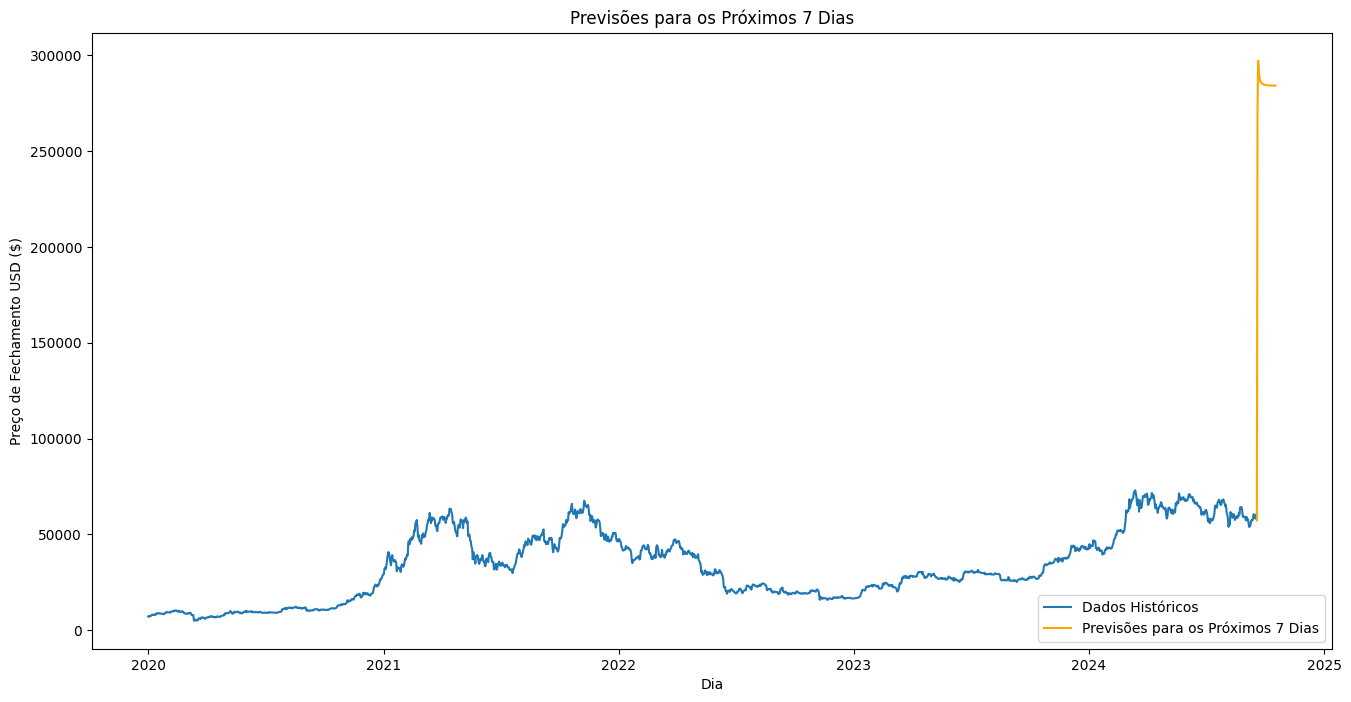

In [63]:
# Caso 'data' não tenha a coluna de data já indexada, você precisa reindexá-la também
data = df.filter(['Close'])

# Agora você pode prosseguir com a plotagem
plt.figure(figsize=(16, 8))
plt.title('Previsões para os Próximos 7 Dias')
plt.xlabel('Dia')
plt.ylabel('Preço de Fechamento USD ($)')
plt.plot(data['Close'], label='Dados Históricos')

# Criar um array de índices para os próximos 7 dias
future_days = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=prevision_days)
plt.plot(future_days, predictions, label='Previsões para os Próximos 7 Dias', color='orange')
plt.legend(loc='lower right')
plt.show()